## Data Loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df_train = pd.read_csv("data/train.csv")
df_train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [2]:
df_test = pd.read_csv("data/test.csv")
df_test.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


## Data Cleaning & Transformation

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [4]:
# Menampilkan statistik deskriptif dari dataset
df_train.describe(include="all")

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [5]:
missing_values = df_train.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [6]:
# menampilkan box plot untuk setiap fitur dalam dataset untuk mendeteksi outlier
# for feature in df_train.columns:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=df_train[feature])
#     plt.title(f"Box Plot of {feature}")
#     plt.show()

In [7]:
# Contoh sederhana untuk mengidentifikasi outliers menggunakan IQR
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df_train < lower) | (df_train > upper)).any(axis=1)
df = df_train.loc[condition, df_train.columns]

In [8]:
# Memastikan hanya data dengan tipe numerikal yang akan diproses
numeric_features = df.select_dtypes(include=['number']).columns

# Standardisasi fitur numerik
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

Text(0.5, 1.0, 'Histogram sebelum standardisasi')

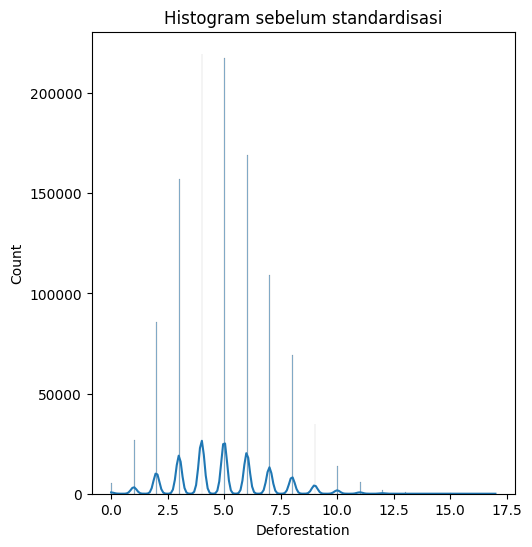

In [9]:
# Histogram sebelum standardisasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_train[numeric_features[4]], kde=True)
plt.title("Histogram sebelum standardisasi")


Text(0.5, 1.0, 'Histogram setelah standardisasi')

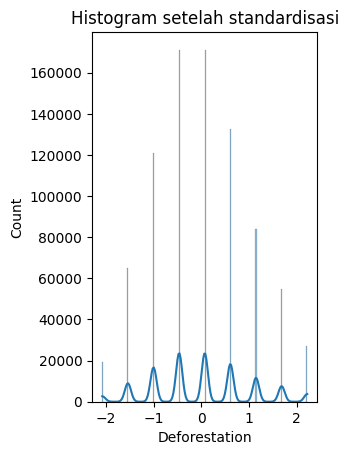

In [10]:
# Histogram setelah standardisasi
plt.subplot(1, 2, 2)
sns.histplot(df[numeric_features[4]], kde=True)
plt.title("Histogram setelah standardisasi")

In [11]:
# Mengidentifikasi baris duplikat
duplicates = df.duplicated()
 
print("Baris duplikat:")
print(df[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [id, MonsoonIntensity, TopographyDrainage, RiverManagement, Deforestation, Urbanization, ClimateChange, DamsQuality, Siltation, AgriculturalPractices, Encroachments, IneffectiveDisasterPreparedness, DrainageSystems, CoastalVulnerability, Landslides, Watersheds, DeterioratingInfrastructure, PopulationScore, WetlandLoss, InadequatePlanning, PoliticalFactors, FloodProbability]
Index: []

[0 rows x 22 columns]


## Exploratory dan Explanatory Data

In [12]:
df.describe(include="all")

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,...,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05
mean,-6.881265e-17,-1.839932e-16,-3.870712e-17,-1.656476e-16,-1.122910e-16,-2.378875e-17,1.193469e-16,1.690748e-16,-1.169278e-17,1.209597e-16,...,-5.177749e-17,-1.122238e-16,-2.022716e-16,-1.614141e-16,-2.247667e-16,9.313900e-17,1.630269e-16,1.419261e-16,-5.342389e-17,-6.361811e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.732268e+00,-2.503498e+00,-2.449018e+00,-2.065325e+00,-2.080702e+00,-2.472198e+00,-2.500029e+00,-2.062896e+00,-2.487267e+00,-2.487272e+00,...,-2.066946e+00,-2.475094e+00,-2.465862e+00,-2.464520e+00,-2.485485e+00,-2.478098e+00,-2.067744e+00,-2.472204e+00,-2.463924e+00,-2.759991e+00
25%,-8.661751e-01,-4.542981e-01,-9.492630e-01,-4.681183e-01,-4.675365e-01,-4.615469e-01,-4.631232e-01,-4.656514e-01,-4.564057e-01,-4.636059e-01,...,-4.634462e-01,-4.649776e-01,-9.579532e-01,-9.577833e-01,-4.547982e-01,-4.547462e-01,-4.655010e-01,-4.602404e-01,-9.593186e-01,-7.136972e-01
50%,2.024918e-05,5.800187e-02,5.057361e-02,6.428396e-02,7.018534e-02,4.111574e-02,4.610324e-02,6.676350e-02,5.130956e-02,4.231074e-02,...,7.105385e-02,3.755159e-02,4.731955e-02,4.670802e-02,5.287338e-02,5.109174e-02,6.857993e-02,4.275047e-02,4.375149e-02,2.505596e-03
75%,8.661002e-01,5.703019e-01,5.504919e-01,5.966862e-01,6.079072e-01,5.437784e-01,5.553296e-01,5.991784e-01,5.590249e-01,5.482274e-01,...,6.055539e-01,5.400808e-01,5.499559e-01,5.489537e-01,5.605450e-01,5.569297e-01,6.026608e-01,5.457413e-01,5.452865e-01,7.187084e-01
max,1.732027e+00,2.619502e+00,2.550165e+00,2.193893e+00,2.221073e+00,2.554429e+00,2.592235e+00,2.196423e+00,2.589886e+00,2.571894e+00,...,2.209054e+00,2.550197e+00,2.560501e+00,2.557936e+00,2.591231e+00,2.580282e+00,2.204904e+00,2.557705e+00,2.551427e+00,2.969631e+00


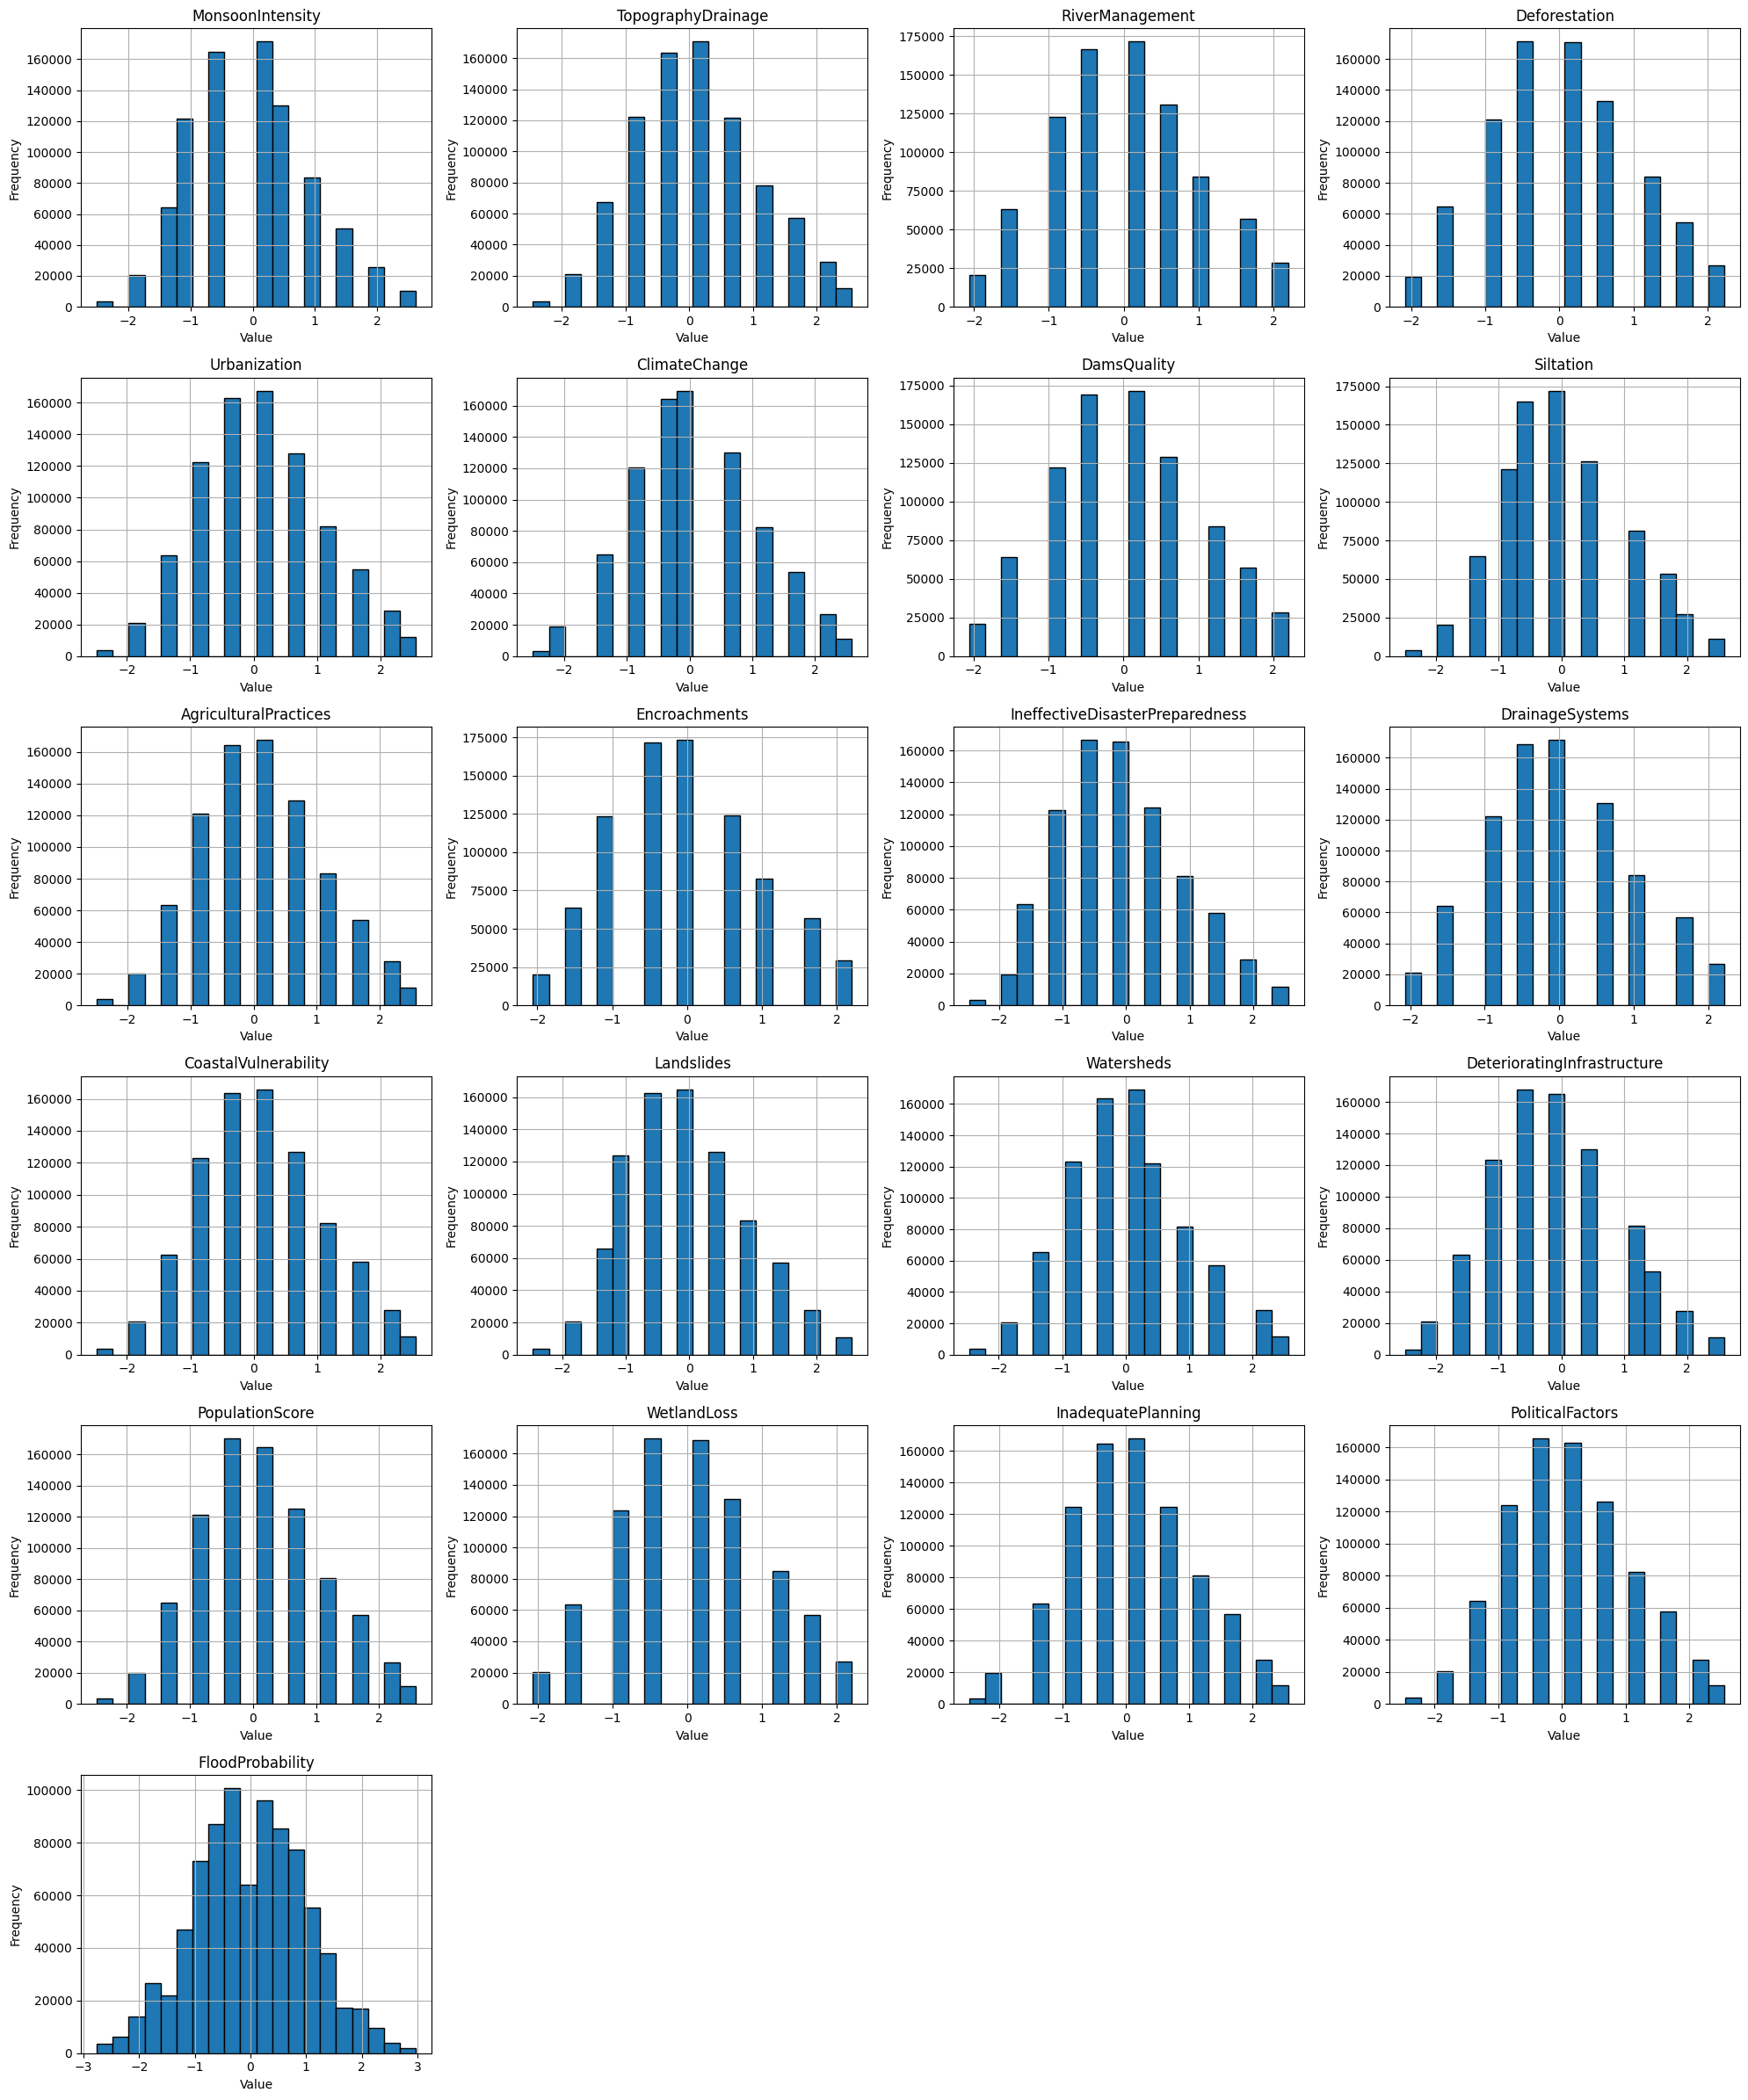

In [13]:
# Menghitung jumlah variabel
num_vars = df.shape[1]
 
# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris
 
# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
 
# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()
 
# Plot setiap variabel
for i, column in enumerate(df.drop(columns=["id"]).columns):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
 
# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
 
# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

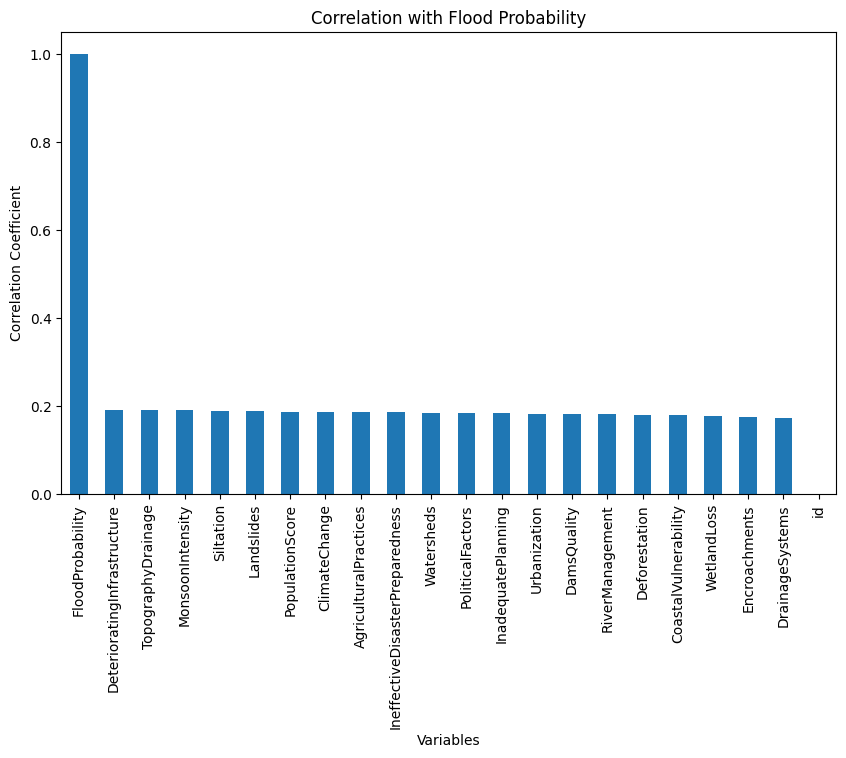

In [14]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
target_corr = df.corr()['FloodProbability']
 
# (Opsional) Mengurutkan hasil korelasi berdasarkan kekuatan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)
 
plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with Flood Probability')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

## Data Splitting

In [15]:
import sklearn
from sklearn import datasets
 
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']
 
from sklearn.model_selection import train_test_split
 
# membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
 
# menghitung panjang/jumlah data
print("Jumlah data: ",len(X))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data latih: ",len(x_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(x_test))

Jumlah data:  845886
Jumlah data latih:  676708
Jumlah data test:  169178


## Modelling

### 1. LARS

In [16]:
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)
 
pred_lars = lars.predict(x_test)

In [17]:
# Menguji performa model LARS
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)
 
print(f"MAE: {mae_lars}")
print(f"MSE: {mse_lars}")
print(f"R²: {r2_lars}")

# Membuat dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE': [mae_lars],
    'MSE': [mse_lars],
    'R2': [r2_lars]
}
 
# Konversi dictionary menjadi DataFrame
df_results = pd.DataFrame(data, index=['Lars'])
df_results

MAE: 0.8064965862112848
MSE: 0.9982455301765664
R²: 0.0007638833508325504


,MAE,MSE,R2
Lars,0.806497,0.998246,0.000764


### 2. Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)
 
pred_LR = LR.predict(x_test)
 
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)
 
print(f"MAE: {mae_LR}")
print(f"MSE: {mse_LR}")
print(f"R²: {r2_LR}")

df_results.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_results

MAE: 0.32914155892050634
MSE: 0.17129638555662166
R²: 0.8285336323325565


,MAE,MSE,R2
Lars,0.806497,0.998246,0.000764
Linear Regression,0.329142,0.171296,0.828534


### 3. GradientBoostingRegressor

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
 
GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(x_train, y_train)
 
pred_GBR = GBR.predict(x_test)
 
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)
 
print(f"MAE: {mae_GBR}")
print(f"MSE: {mse_GBR}")
print(f"R²: {r2_GBR}")

MAE: 0.5126715936448324
MSE: 0.3804907514322631
R²: 0.6191316771387398


In [20]:
df_results.loc['GradientBoostingRegressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_results

,MAE,MSE,R2
Lars,0.806497,0.998246,0.000764
Linear Regression,0.329142,0.171296,0.828534
GradientBoostingRegressor,0.512672,0.380491,0.619132


## 📊 Ringkasan Hasil Modeling Regresi

Pada eksperimen ini, dilakukan perbandingan tiga algoritma regresi, yaitu **Lars**, **Linear Regression**, dan **GradientBoostingRegressor**, dengan evaluasi menggunakan metrik **MAE**, **MSE**, dan **R²**.

### 🔍 Hasil Evaluasi Model

| Model                     | MAE     | MSE     | R²       |
|---------------------------|---------|---------|----------|
| Lars                      | 0.8065  | 0.9982  | 0.0008   |
| Linear Regression         | 0.3291  | 0.1713  | 0.8285   |
| GradientBoostingRegressor | 0.5127  | 0.3805  | 0.6191   |

### 🧠 Interpretasi

- **Lars**
  - Memiliki performa paling buruk.
  - Nilai R² yang mendekati nol menunjukkan bahwa model hampir tidak mampu menjelaskan variasi data.
  - Tidak cocok digunakan untuk dataset ini.

- **Linear Regression**
  - Memberikan performa terbaik di semua metrik evaluasi.
  - Nilai MAE dan MSE paling kecil serta R² tertinggi (> 0.8).
  - Menunjukkan bahwa hubungan antara fitur dan target cenderung linear.

- **GradientBoostingRegressor**
  - Performa cukup baik, namun masih kalah dibanding Linear Regression.
  - Mengindikasikan adanya non-linearitas, tetapi tidak dominan atau belum optimal karena hyperparameter default.

### ✅ Kesimpulan

Berdasarkan hasil evaluasi, **Linear Regression** merupakan model terbaik untuk dataset ini.  
Model yang lebih kompleks tidak selalu menghasilkan performa yang lebih baik, terutama ketika struktur data cenderung linear.